In [1]:
#Import thư viện
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Đọc dữ liệu
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#Phân tích EDA
#a. Hiển thị cách đánh index của dữ liệu
df.index

RangeIndex(start=0, stop=303, step=1)

In [5]:
#b. Danh sách các cột input
columns_eda = df.columns[:-1]
columns_eda

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

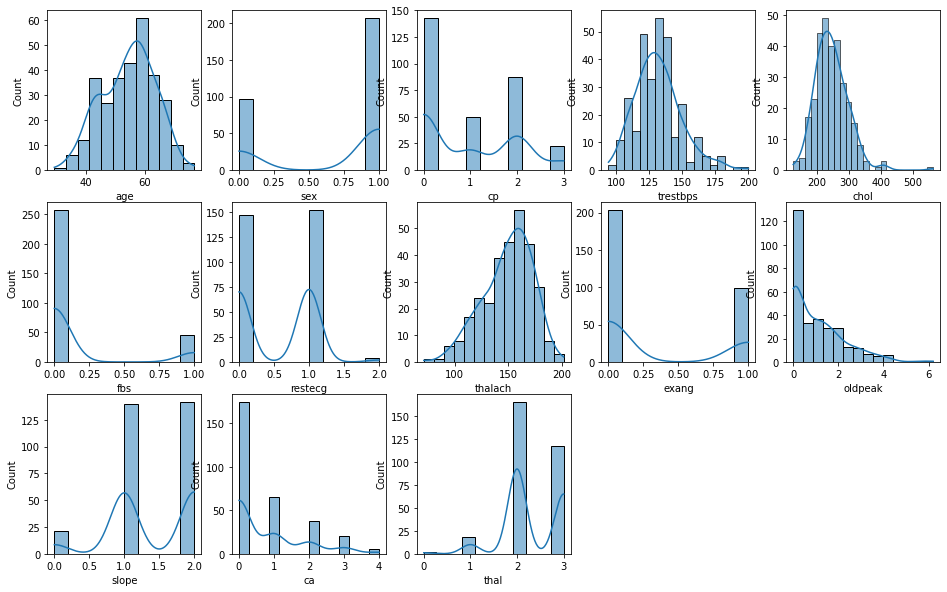

In [10]:
#c. Phân tích phân phối các biến số input
fig = plt.figure(figsize=(16, 10))

for i in range(len(columns_eda)):
    colname = columns_eda[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sns.histplot(data = df, x = colname, kde = True)

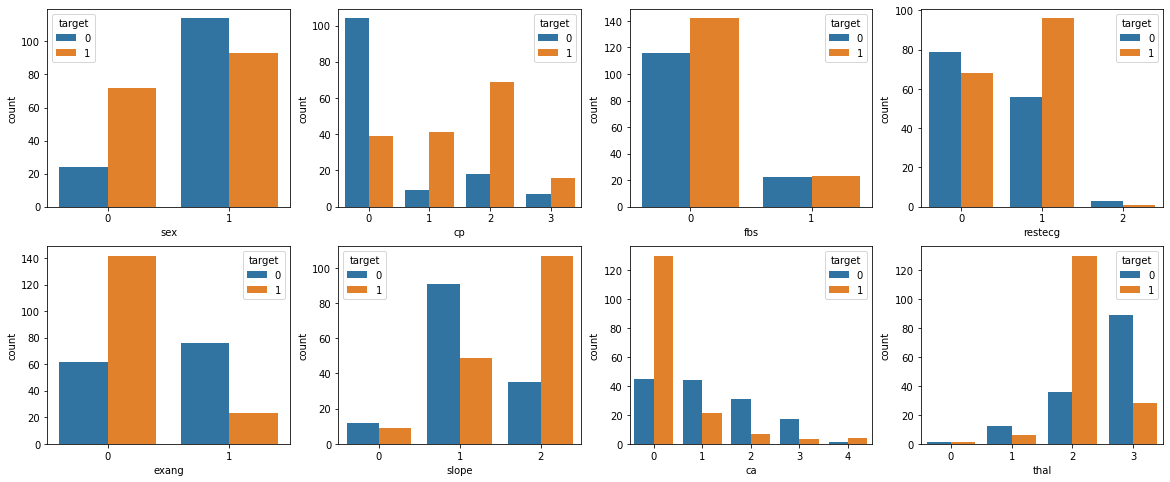

In [12]:
#d. Đếm số lượng biến input
categories_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig = plt.figure(figsize = (20, 8))
for i in range(len(categories_list)):
    colname = categories_list[i]
    sub = fig.add_subplot(2, 4, i + 1)
    sns.countplot(data = df, x = colname, hue = 'target')

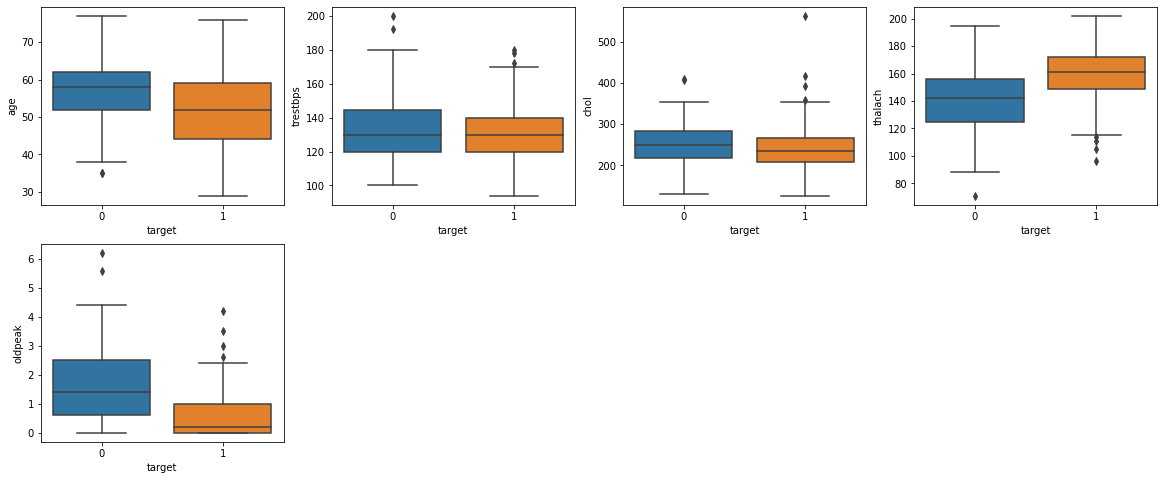

In [14]:
#e. PHân tích biểu đồ box-plot các biến input
numeric_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig = plt.figure(figsize=(20, 8))
for i in range(len(numeric_list)):
    colname = numeric_list[i]
    sub = fig.add_subplot(2, 4, i + 1)
    sns.boxplot(data = df, y = colname, x = "target")

#### B. Xây dựng mô hình

In [16]:
#4.1 Chuẩn bị dữ liệu
X = df.iloc[:, :-1].values
y = df[['target']].values
X = X.astype(float)
y = y.astype(float)

In [19]:
#4.2 Phân chia tập dữ liệu thành hai phần train và test tỉ lệ 80:20 và hệ số random là 42
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, df.index, test_size = 0.2, random_state=42)

In [20]:
#4.3 Hiển thị danh sách 5 dòng cuối cùng trong tập X_test và y_test
print(X_test[0:5])
print(y_test[0:5])

[[5.70e+01 1.00e+00 0.00e+00 1.50e+02 2.76e+02 0.00e+00 0.00e+00 1.12e+02
  1.00e+00 6.00e-01 1.00e+00 1.00e+00 1.00e+00]
 [5.90e+01 1.00e+00 3.00e+00 1.70e+02 2.88e+02 0.00e+00 0.00e+00 1.59e+02
  0.00e+00 2.00e-01 1.00e+00 0.00e+00 3.00e+00]
 [5.70e+01 1.00e+00 2.00e+00 1.50e+02 1.26e+02 1.00e+00 1.00e+00 1.73e+02
  0.00e+00 2.00e-01 2.00e+00 1.00e+00 3.00e+00]
 [5.60e+01 0.00e+00 0.00e+00 1.34e+02 4.09e+02 0.00e+00 0.00e+00 1.50e+02
  1.00e+00 1.90e+00 1.00e+00 2.00e+00 3.00e+00]
 [7.10e+01 0.00e+00 2.00e+00 1.10e+02 2.65e+02 1.00e+00 0.00e+00 1.30e+02
  0.00e+00 0.00e+00 2.00e+00 1.00e+00 2.00e+00]]
[[0.]
 [0.]
 [1.]
 [0.]
 [1.]]


In [21]:
#4.4 Hiển thị danh sách index của các sample trong tập X_train, X_test
print(indices_train)
print(indices_test)

Int64Index([132, 202, 196,  75, 176,  59,  93,   6, 177,  30,
            ...
             87, 214, 121, 302,  20, 188,  71, 106, 270, 102],
           dtype='int64', length=242)
Int64Index([179, 228, 111, 246,  60,   9, 119, 223, 268,  33,   5, 101,  45,
            175, 118,  46, 125, 192, 285, 279, 152, 269, 272,  25, 146, 283,
            254,  73, 231, 109, 139, 284, 198,  42,  17, 168,  76,  90,  24,
             57,  92,  77, 137, 116,   7, 251, 281,  78, 292, 232, 219, 255,
             63,  82, 236, 204, 249, 104, 300, 193, 184],
           dtype='int64')


In [31]:
#4.5 Huấn luyện mô hình
knnModel = KNeighborsClassifier(n_neighbors = 5, algorithm = "brute", metric = "minkowski")
knnModel.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='brute')

In [32]:
#4.6 Đánh giá mô hình
print(knnModel.score(X_train, y_train))
print(knnModel.score(X_test, y_test))

0.7603305785123967
0.6885245901639344


#### 5. Hperparameter tuning model with Grid Search

Number of candidates: 20
0/19:  {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 2} 0.8099173553719008 0.639344262295082
[[{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 2}, 0.8099173553719008, 0.639344262295082]]
Max score on train: [{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 2}, 0.8099173553719008, 0.639344262295082]
Max score on test: [{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 2}, 0.8099173553719008, 0.639344262295082]
[0.8099173553719008]
[0.639344262295082]
1/19:  {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 3} 0.7727272727272727 0.6557377049180327
[[{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 2}, 0.8099173553719008, 0.639344262295082], [{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 3}, 0.7727272727272727, 0.6557377049180327]]
Max score on train: [{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 2}, 0.8099173553719008, 0.6393442

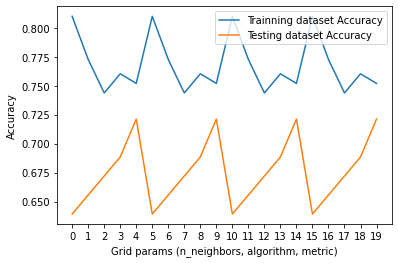

In [39]:
#Sử dụng grid-search với nhiều hyper-parameter
from sklearn.model_selection import ParameterGrid
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': range(2, 7), 'algorithm': ['ball_tree', 'kd_tree'], 'metric': ['euclidean', 'minkowski']}
param_candidates = ParameterGrid(param_grid)

print(f'Number of candidates: {len(param_candidates)}')

results = []
for i, params in enumerate(param_candidates):
    model = estimator.set_params(**params)
    model.fit(X_train, y_train.ravel())
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    results.append([params, score_train, score_test])
    print(f'{i}/{len(param_candidates)-1}: ', params, score_train, score_test)
    
    print(results)
    print(f'Max score on train: {max(results, key = lambda x: x[1])}')
    print(f'Max score on test: {max(results, key = lambda x: x[2])}')
    
    list_index_on_results = range(len(results))
    
    list_score_on_train = [x[1] for x in results]
    print(list_score_on_train)
    
    list_score_on_test = [x[2] for x in results]
    print(list_score_on_test)
    
 #generate plot
plt.plot(list_index_on_results, list_score_on_train, label = 'Trainning dataset Accuracy')
plt.plot(list_index_on_results, list_score_on_test, label = 'Testing dataset Accuracy')

plt.legend()
plt.xlabel("Grid params (n_neighbors, algorithm, metric)")
plt.xticks(range(len(results)), range(len(results)))
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#5.2 Sử dụng tham số K để dò giá trị k tốt nhất
import numpy as np
neighbors = np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit